### Esercizio 1

Un'urna contiene n palline tutte rosse. Un'urna B contiene n palline di cui r rosse (1 $\le$ r < n) e le rimanenti n-r nere. Si sceglie a caso una delle due urne e da essa si effettua una successione di estrazioni con rimpiazzo.

a) Qual'è la probabilità che la prima pallina estratta sia rossa?<br>
b) Qual'è la probabilità che le prime due palline estratte abbiano colori diversi?<br>
c) Quante estrazioni sono necessarie in media per vedere comparire per la prima volta una pallina rossa?<br>
d) Sapendo che le prime k palline estratte sono rosse, qual'è la probabilità che l'urna dalla quale esse sono state estratte sia l'urna A? Supponiamo n=12, r=4; <br> Quanto grande dovrà essere k perchè si possa concludere che l'urna da cui le palline sono state estratte sia l'urna A con una probabilità del 99%?

a) Consideriamo i seguenti: 

r = numero di palline rosse nell'urna B<br>
n = numero di palline totali nell'urna B<br>
P(RA) = 1 probabilità di estrarre una pallina rossa dall'urna A<br>
P(A) = $ \frac{1}{2}$ probabilità di scegliere l'urna A<br>
P(RB) = r/n probabilità di estrarre una pallina rossa dall'urna B<br>
P(B) = $ \frac{1}{2}$ probabilità di scegliere l'urna B<br>
$P(R) = P(RA) \cdot P(A) + P(RB) \cdot P(B)$<br>

b) Siano:

n = 2 numero di tentativi<br>
k = 1 numero di successi<br>
P(RB)= n!/(k! \cdot (n-k)!) \cdot P(R) \cdot (1-P(R))

c) Siano:

Il tempo di primo successo segue una distribuzione geometrica di parametro p = P(R)<br>
Il numero di estrazioni in media per veder comparire per la prima volta una pallina rossa è:<br>
Per l'urna A, NA = (1-P(RA))/P(RA)+1<br>
Per l'urna B, NB = (1-P(RB))/P(RB)+1<br>
Per ottenere il numero di estrazioni medio totale occorre fare una media tra NA e NB:<br>
Numero di estrazioni necessarie in media per veder comparire per la prima volta una pallina rossa = $\frac {(NA + NB)}{2}$

d) Consideriamo i seguenti eventi:

- A: estrarre una pallina da A
- B: estrarre una pallina da B
- EK: estrazione di K palline rosse

Per il **teorema delle probabilità totali** si ha che<br>
$P(EK) = P(EK_A) \cdot P(A) + P(EK_B) \cdot P(B) = 1 \cdot \frac{1}{2} + D_{\frac{r}{n}, k} \cdot \frac{1}{2}$ <br>
poiché si hanno Disposizioni con ripetizione.

$P(A|EK) = \frac{P(EK|A) \cdot P(A)}{P(EK)} = \frac{1 \cdot \frac{1}{2}}{1 + D_{\frac{r}{n}, k}}$

In [1]:
n = 12
r = 4
p_target = 0.99
k = 1 #almeno un'estrazione

pa = pb = 1/2
num = 1 * pa

while ((1*pa)/(1*pa + pow(r/n,k)*pb)) <= p_target:
    k += 1
    
print(f'Valore di k: {k}')

Valore di k: 5


### Esercizio 2

Nella tabella che segue si riporta il peso (in mg) del principio attivo misurato in un campione di 10 compresse estratto da un lotto di produzione di un nota marca farmaceutica.

[4.65, 4.7, 4.75, 4.77, 4.8, 4.95, 5, 4.75, 4.54, 4.66]

Supponendo che questo campione sia estratto da un lotto avente popolazione distribuita secondo una normale di parametri incogniti si svolgano i seguenti quesiti.

a) Si calcoli la media campionaria, la deviazione standard e l'intervallo di confidenza con livello di fiducia 0.01.<br>
b) Si rappresentino i dati mediante box-plot e si commenti il grafico.<br>
c) Se il principio attivo presente nella compressa deve essere pari a 4.7mg, possiamo dire con un livello di fiducia 0.05 che il lotto di produzione rientra in questa specifica.

In [2]:
import numpy as np
from scipy.stats import t

x = np.array([4.65, 4.7, 4.75, 4.77, 4.8, 4.95, 5, 4.75, 4.54, 4.66])
n = x.size

mu = np.mean(x)
print(f'Media campionaria: {mu:.3f}')

s = np.std(x, ddof=1)
print(f'Deviazione standard campionaria: {s:.3f}')

alpha = 0.01
T = t.ppf(1-alpha/2, n-1)

A = mu-(s/np.sqrt(n)*T)
B = mu+(s/np.sqrt(n)*T)
print(f'Intervalli di confidenza per la media: ]{A:.3f}, {B:.3f}[')

Media campionaria: 4.757
Deviazione standard campionaria: 0.137
Intervalli di confidenza per la media: ]4.616, 4.898[


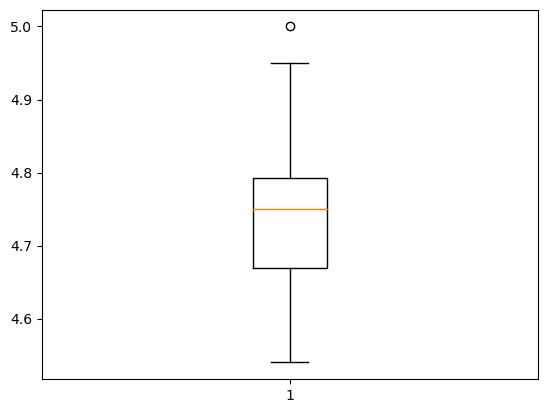

In [3]:
import matplotlib.pyplot as plt

plt.boxplot(x)
plt.show()

In [4]:
# Imposto un test bilatero sulla media a varianza ignota
# H0: mu = mu0
# H1: mu <> mu0

mu0 = 4.7
alpha = 0.05
T0 = (mu-mu0)/s*np.sqrt(n)

cond = np.abs(T0) > T
print("Rigetto l'ipotesi nulla in favore dell'alternativa" if cond else "Non ho abbastanza elementi per rigettare")

Non ho abbastanza elementi per rigettare


### Esercizio 3

La seguente tabella raccoglie i dati relativi alle temperature medie invernali registrate negli ultimi 10 anni in una città italiana.

- Anno: 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017<br>
- Temperatura: 10, 11, 10.5, 12, 10, 12, 11, 13<br>

Si svolgano i seguenti quesiti.

a) Si determinano i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%.<br>
b) Si rappresentino i dati e la retta di regressione in uno stesso grafico.<br>
c) Si determini il coefficiente di Pearson.<br>
d) Si determini il valore della temperatura previsto per l'anno 2022 e il suo intervallo di confidenza al 95%.<br>

In [5]:
x = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
y = np.array([10, 11, 10.5, 12, 10, 12, 11, 13])

n = x.size
k = 2
alpha = 0.05

x1 = np.ones(n)
x2 = x
X = np.ones((n, k))
X[:,0] = x1
X[:,1] = x2

XX = np.linalg.pinv(X)
b = XX@y
y_hat = X@b
r = y-y_hat
s = np.sum(r**2)/(n-k)
T = t.ppf(1-alpha/2, n-k)

M = np.linalg.inv(X.T @ X)

A = b[0] - s*np.sqrt(M[0][0])*T
B = b[0] + s*np.sqrt(M[0][0])*T
print(f'Intervalli di confidenza per b0 ({b[0]:.3f}): ]{A:.3f}, {B:.3f}[')

A = b[1] - s*np.sqrt(M[1][1])*T
B = b[1] + s*np.sqrt(M[1][1])*T
print(f'Intervalli di confidenza per b1 ({b[1]:.3f}): ]{A:.3f}, {B:.3f}[')

Intervalli di confidenza per b0 (-552.113): ]-1145.289, 41.063[
Intervalli di confidenza per b1 (0.280): ]-0.015, 0.574[


[]

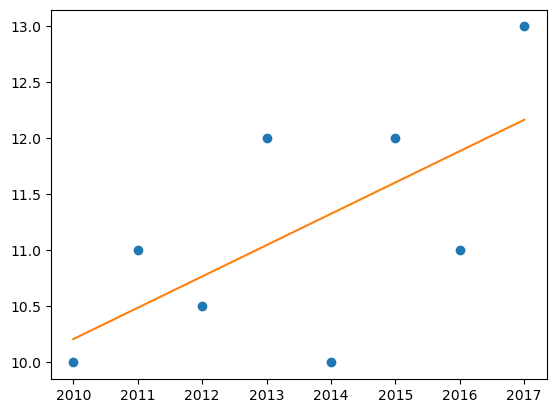

In [6]:
Y = b[0] + b[1]*x
plt.plot(x, y, 'o')
plt.plot(x, Y)
plt.plot()

In [7]:
y_bar = np.mean(y)
R2 = np.sum((y_hat-y_bar)**2)/np.sum((y-y_bar)**2)
R = np.sqrt(R2)
print(f'Coefficiente di Pearson: {R:.3f}')

Coefficiente di Pearson: 0.642


In [8]:
x_star = 2022
Y = b[0] + b[1]*x_star
print(f'Predizione di temperature medie invernali per il {x_star}: {Y:.3f}')

alpha = 0.05
x_bar = np.mean(x)
sig2_x = np.sum((x-x_bar)**2)/n

A = b[0]+b[1]*x_star-np.sqrt(1 + 1/n + ((x_star-x_bar)**2)/(n*sig2_x))*T
B = b[0]+b[1]*x_star+np.sqrt(1 + 1/n + ((x_star-x_bar)**2)/(n*sig2_x))*T
print(f'Intervallo di confidenza per la predizione: ({Y:.3f}): ]{A:.3f}, {B:.3f}[')

Predizione di temperature medie invernali per il 2022: 13.565
Intervallo di confidenza per la predizione: (13.565): ]9.438, 17.693[
